**NOMBRE ALUMNO:** Jonathan Rodriguez

**FECHA:** 

## 1. Importe un csv desde internet

Utilice la base de datos de un compañero creada en la sesión pasada

In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(1641)

df = pd.read_csv('subsample_jrc.csv')
df_comp = pd.read_csv('subsample_comp.csv')

In [7]:
df.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod
0,0.351,NER,4,644.53998,NaN,NaN,0.15,8.400000,5.821299,SubSaharian
1,0.909,SWE,5,39000.91000,9.645000,2.300000,7.30,21.900000,11.929840,WesternDem
2,0.575,BGD,8,1796.64000,154.695007,33.099998,0.01,21.799999,2.818999,SouthAsia
3,0.896,LUX,5,61404.48000,0.550000,1.700000,11.12,24.400000,6.937873,WesternDem
4,0.431,SLE,4,979.95001,6.232000,117.400002,3.78,34.400002,11.089902,SubSaharian


In [8]:
df_comp.head()

,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region_recod
0,0.896,LUX,5,61404.4800,0.550,1.700000,11.12,24.400000,6.937873,WesternDem
1,0.739,ECU,2,7259.5200,15.775,19.100000,3.82,9.000000,9.161088,LatAm
2,0.735,LCA,10,11095.8000,0.167,NaN,9.97,NaN,6.719041,Caribbean
3,0.781,SYC,4,9583.3203,0.090,11.200000,9.72,26.700001,3.369817,SubSaharian
4,0.438,MLI,4,1063.2600,14.854,79.599998,0.61,18.600000,6.862166,SubSaharian


## 2. Importe su conjunto de funciones

Genere un archivo _ancilliary_funcs.py_ para guardar las funciones creadas en la sesión pasada e impórtelo.

Utilice las funciones creadas para inspeccionar la cantidad de casos perdidos de la muestra de su compañero.

In [11]:
from ancilliary_funcs_jrc import *


lista = []
# Registrando los nombres de columnas en una lista
for value in df_comp:
    lista.append(value)

# Analizando todas las variables con sus casos perdidos    
for value in range(len(lista)):
    codigo_columna = lista[value]
    c_perdidos, p_perdidods = getna(df_comp,codigo_columna)
    print(lista[value])
    print('____________________')
    print('Cantidad de perdidos {}'.format(c_perdidos))
    print('Porcentaje de perdidos: {}'.format(round(p_perdidods,2)))   
    print('\n')    
    


undp_hdi
____________________
Cantidad de perdidos 3
Porcentaje de perdidos: 0.03


ccodealp
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0


ht_region
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0


gle_cgdpc
____________________
Cantidad de perdidos 1
Porcentaje de perdidos: 0.01


imf_pop
____________________
Cantidad de perdidos 24
Porcentaje de perdidos: 0.25


wef_imort
____________________
Cantidad de perdidos 26
Porcentaje de perdidos: 0.27


who_alc2000
____________________
Cantidad de perdidos 8
Porcentaje de perdidos: 0.08


who_tobt
____________________
Cantidad de perdidos 30
Porcentaje de perdidos: 0.31


wdi_exph
____________________
Cantidad de perdidos 1
Porcentaje de perdidos: 0.01


region_recod
____________________
Cantidad de perdidos 0
Porcentaje de perdidos: 0.0




## 3. Estime el puntaje Z

Estime el puntaje Z para las 10 primeras y últimas observaciones de las variables con una menor cantidad de datos perdidos

* Genere una nueva columna en la tabla de datos mediante funciones vectorizadas. Recuerde que para calcular el puntaje z de una observación se utiliza la fórmula:  $z_{i} = (x_{i} - \overline{x})/\sigma(x)$
* Para ordenar los valores pueden utilzar la función **sort_values** del **DataFrame** analizado.
* Lean la documentación asociada al argumento **by** . Para evitar conflictos en la sobreescritura
* Asegúrense de eliminar las observaciones que tengan valores perdidos con **dropna** . Lean la documentación asociada al método **subset** .
* Seleccionen las primeras y últimas 10 observaciones de la base reordenada. ¿Qué características en común se encuentran?

In [17]:
def zvalue (df, col):
    df = df.sort_values(by=[col])
    df = df[col].dropna()
    return (df - df.mean()) / df.std()


df_comp['gle_cgdpc_zscore'] = zvalue(df_comp, 'gle_cgdpc')

df_comp['undp_hdi_zscore'] = zvalue(df_comp, 'undp_hdi')

df_comp['wdi_exph_zscore'] = zvalue(df_comp, 'wdi_exph')


print('gle_cgdpc')
print('____________-')
print('head')
print (df_comp.sort_values(by='gle_cgdpc_zscore')[:10]['gle_cgdpc_zscore'])
print('tail')
print (df_comp.sort_values(by='gle_cgdpc_zscore')[-10:]['gle_cgdpc_zscore'])
print('\n')

print('undp_hdi')
print('____________-')
print('head')
print (df_comp.sort_values(by='gle_cgdpc_zscore')[-10:]['undp_hdi_zscore'])
print('tail')
print (df_comp.sort_values(by='gle_cgdpc_zscore')[:10]['undp_hdi_zscore'])
print('\n')

print('wdi_exph')
print('____________-')
print('head')
print (df_comp.sort_values(by='gle_cgdpc_zscore')[-10:]['wdi_exph_zscore'])
print('tail')
print (df_comp.sort_values(by='gle_cgdpc_zscore')[:10]['wdi_exph_zscore'])
print('\n')


gle_cgdpc
____________-
head
22   -0.721161
69   -0.713742
62   -0.711581
49   -0.705286
21   -0.701576
42   -0.698177
52   -0.695142
4    -0.693861
75   -0.692308
95   -0.680557
Name: gle_cgdpc_zscore, dtype: float64
tail
31    1.101127
29    1.107436
55    1.262101
71    1.651253
0     2.171168
25    2.310676
46    4.110224
68    4.195969
34    4.406388
84         NaN
Name: gle_cgdpc_zscore, dtype: float64


undp_hdi
____________-
head
31    1.226225
29    1.335153
55    1.424858
71    1.520971
0     1.251855
25    0.630324
46    1.347968
68    0.989146
34         NaN
84   -1.791724
Name: undp_hdi_zscore, dtype: float64
tail
22   -1.753278
69   -2.240251
62   -2.265881
49   -1.215046
21   -1.663573
42   -1.298344
52   -1.388049
4    -1.682796
75   -1.932689
95   -1.362419
Name: undp_hdi_zscore, dtype: float64


wdi_exph
____________-
head
31    1.686111
29    1.949295
55    1.574139
71    1.850988
0     0.135561
25   -1.279796
46         NaN
68   -1.590555
34   -0.809168
84   -1.3902

## 4. Estime el puntaje z de las regiones

Para ello, modifique la función para generar dotplots de la semana pasada, donde deberá agregar 
una opción al argumento **statistic** para calcular el puntaje z.


In [24]:
def getdotplot(dataframe,plot_var,plot_by,global_stat = False, statistic = 'mean'):
    """
    Función que liste las observaciones perdidas de una variable

    Parameters:
    dataframe (Dataframe): La base de datos donde se encuentran los datos específicos.
    plot_var (str): La variable a analizar y extraer las medias
    plot_by (str): La variable agrupadora
    global_stat: Booleano. Si es True debe graficar la media global de la variable. Por defecto debe ser False     
    statistic: Debe presentar dos opciones. mean para la media y median para la mediana. Por defecto debe ser mean

    Returns:  Graficacion de Dotplot


   """      
    df_dropna = dataframe.dropna(subset=[plot_var]) 
    plt.title("Dotplot caso: {}".format(statistic))
    if (statistic == 'mean'):
        group_stat = round(df_dropna.groupby(plot_by)[plot_var].mean(),2)
        if (global_stat):
            plt.axvline(df_dropna[plot_var].mean(), color = 'tomato', linestyle = '--', )
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')
    if (statistic == 'median'):
        group_stat = round(df_dropna.groupby(plot_by)[plot_var].median(),2)
        if (global_stat):
            plt.axvline(df_dropna[plot_var].median(), color = 'green', linestyle = '--')
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')         
    if (statistic == 'z-score'):
        tmp_df = dataframe[plot_var].dropna()
        group_stat = dataframe.groupby(plot_by)[plot_var].mean()
        plt.plot(group_stat.values, group_stat.index, 'o', color = 'blue')      
        


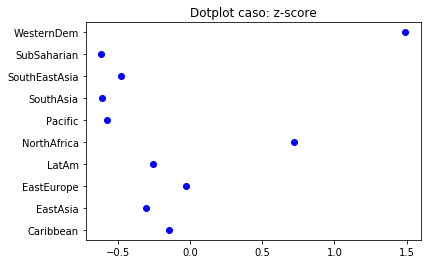

In [25]:
getdotplot(df_comp,'gle_cgdpc_zscore','region_recod',True,'z-score')  

## 5. Genere un método que devuelva un gráfico comparando dos curvas de densidad

* El método debe contener los siguientes argumentos:
    * *df1* : Tabla de datos 1.
    * *df2* : Tabla de datos 2.
    * *variable* : Variable a contrastar.
    * *log* : Booleano. Si es True transformar la variable al logaritmo. Por defecto debe ser False .

* Grafique las curvas para **imf_pop** , **gle_cgdpc** y **undp_hdi** . ¿En qué casos es necesario utilizar logaritmos? ¿Por qué?

In [58]:
def curva_densidad(df1, df2, var, log=False):
    df = pd.DataFrame({
     'df_1': df1[var].dropna(),
     'df_2': df2[var].dropna(),
    })    
    if log is True:
        df = pd.DataFrame({
         'df_1': np.log(df1[var].dropna()),
         'df_2': np.log(df2[var].dropna()),
        })       
    df.plot.kde()      
    
    

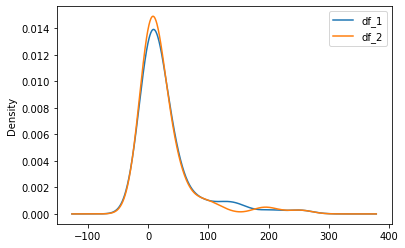

In [59]:
curva_densidad(df, df_comp, 'imf_pop', False)


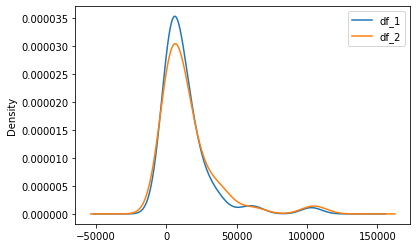

In [60]:
curva_densidad(df, df_comp, 'gle_cgdpc', False)


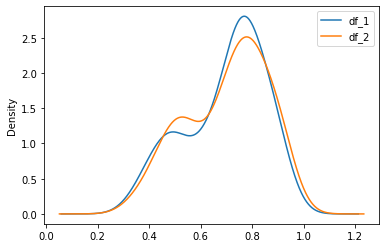

In [61]:
curva_densidad(df, df_comp, 'undp_hdi', False)


* En este caso no se presenta un comportamiento similar a una normal (0,1), por tanto debe aplicarse el logaritmo


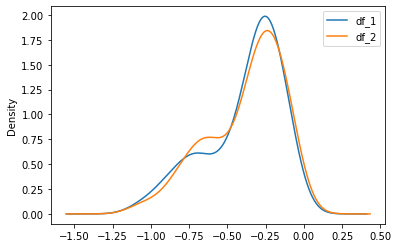

In [62]:
curva_densidad(df, df_comp, 'undp_hdi', True)
